# Exam


## Problem 2: Career choice model

### Question 1


We are looking into the dynamics of a career choice model, where we are asked to simulate and calculate expected and realized utility, where the graduates know $v_j$ and the distribution of $\epsilon_j$. This is done below.

In [70]:
import numpy as np
import pandas as pd

# Define the parameters
par = SimpleNamespace()
par.J = 3
par.N = 10
par.K = 10000

par.F = np.arange(1,par.N+1)
par.sigma = 2

par.v = np.array([1, 2, 3])
par.c = 1

# Simulate and calculate expected utility and average realized utility
def simulate_utilities(par):
    # Simulate epsilons
    epsilon = np.random.normal(0, par.sigma, (par.K, par.J))

    # Calculate expected utility for each career track j
    expected_utility = par.v + (1 / par.K) * np.sum(epsilon, axis=0)

    # Calculate the average realized utility
    average_realized_utility = par.v + np.mean(epsilon, axis=0)

    return expected_utility, average_realized_utility

expected_utility, average_realized_utility = simulate_utilities(par)

# Display the results
df = pd.DataFrame({
    'Career Track': np.arange(1, par.J + 1),
    'Expected Utility': expected_utility,
    'Average Realized Utility': average_realized_utility
})

print(df)


   Career Track  Expected Utility  Average Realized Utility
0             1          0.993241                  0.993241
1             2          1.971983                  1.971983
2             3          3.019397                  3.019397


We get utility values very close to the true value, as we run the simulation 10.000 times. This is as the graduates know the distribution of the error term, where the expected value is zero, hence we are left with utility very close to $v_j$.

### Question 2

We now consider the scenario where $v_j$ is not known to the graudates. Start by calculating and storing the chosen career paths. 

In [71]:
def simulate_new_scenario(par):
    results = []

    for k in range(par.K):
        for i in range(1, par.N + 1):
            # Draw J * F_i values of epsilon
            epsilon_friends = np.random.normal(0, par.sigma, (par.F[i - 1], par.J))
            epsilon_own = np.random.normal(0, par.sigma, par.J)

            # Calculate the prior expected utility of each career track
            prior_expected_utility = par.v + np.mean(epsilon_friends, axis=0)

            # Choose the career track with the highest expected utility
            chosen_career = np.argmax(prior_expected_utility)

            # Store the chosen career, prior expectation, and realized value
            realized_value = par.v[chosen_career] + epsilon_own[chosen_career]
            results.append({
                'Graduate': i,
                'Chosen Career': chosen_career + 1,
                'Prior Expected Utility': prior_expected_utility[chosen_career],
                'Realized Utility': realized_value
            })

    return pd.DataFrame(results)



Which we print, where we see prior expected and realized utility get closer as the graduates obtain more friends, which makes sense in the model.

In [72]:
# Simulate the new scenario
df_results = simulate_new_scenario(par)

# Display the results
df_summary = df_results.groupby('Graduate').agg({
    'Prior Expected Utility': 'mean',
    'Realized Utility': 'mean'
}).reset_index()

print(df_summary)


   Graduate  Prior Expected Utility  Realized Utility
0         1                3.913398          2.397557
1         2                3.475328          2.537159
2         3                3.315165          2.570426
3         4                3.225204          2.694811
4         5                3.173275          2.736341
5         6                3.142066          2.753562
6         7                3.105148          2.782945
7         8                3.094251          2.806166
8         9                3.082736          2.868207
9        10                3.057197          2.846077


Next, we simulate and visualize the development and impact of obtaining more friends.

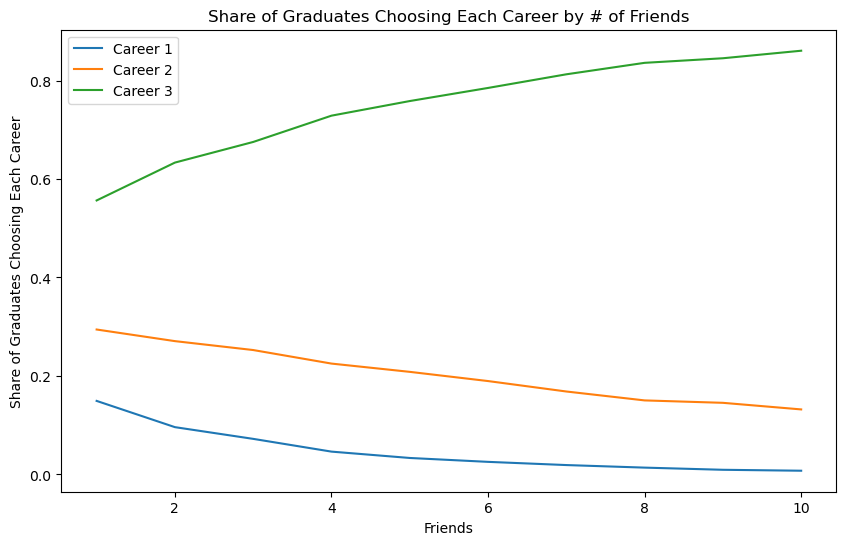

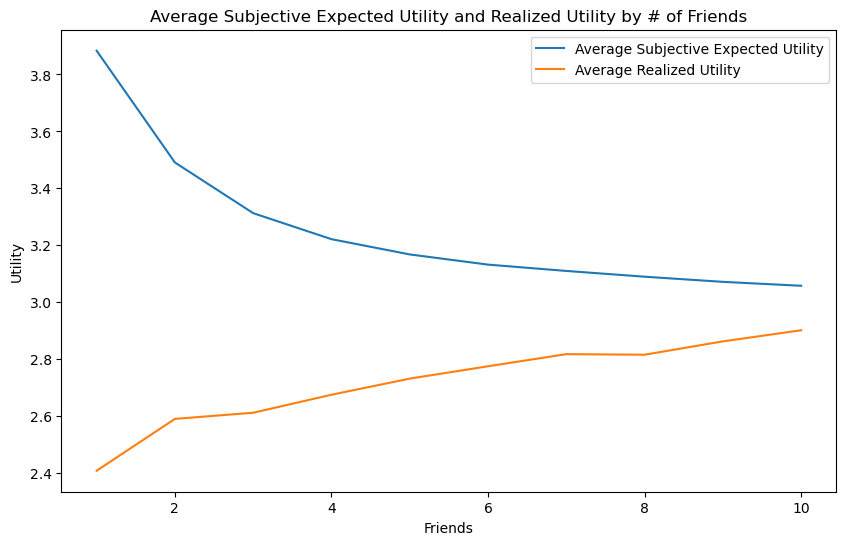

In [75]:
import matplotlib.pyplot as plt

# Initialize dictionaries to store results
choice_shares = {j: np.zeros(par.N) for j in range(1, par.J + 1)}
avg_subjective_expected_utility = np.zeros(par.N)
avg_realized_utility = np.zeros(par.N)

# Simulate the new scenario
for k in range(par.K):
    for i in range(1, par.N + 1):
        # Draw J * F_i values of epsilon
        epsilon_friends = np.random.normal(0, par.sigma, (par.F[i - 1], par.J))
        epsilon_own = np.random.normal(0, par.sigma, par.J)

        # Calculate the prior expected utility of each career track
        prior_expected_utility = par.v + np.mean(epsilon_friends, axis=0)

        # Choose the career track with the highest expected utility
        chosen_career = np.argmax(prior_expected_utility)

        # Increment choice share for the chosen career
        choice_shares[chosen_career + 1][i - 1] += 1

        # Store the prior expectation and realized value for averages
        avg_subjective_expected_utility[i - 1] += prior_expected_utility[chosen_career]
        realized_value = par.v[chosen_career] + epsilon_own[chosen_career]
        avg_realized_utility[i - 1] += realized_value

# Calculate the averages
for j in choice_shares:
    choice_shares[j] /= par.K

avg_subjective_expected_utility /= par.K
avg_realized_utility /= par.K

# Convert choice shares to a DataFrame for easier plotting
df_choice_shares = pd.DataFrame(choice_shares)
df_choice_shares['Graduate'] = np.arange(1, par.N + 1)
df_choice_shares = df_choice_shares.melt(id_vars='Graduate', var_name='Career Track', value_name='Share')

# Plot the choice shares
plt.figure(figsize=(10, 6))
for career in range(1, par.J + 1):
    plt.plot(df_choice_shares[df_choice_shares['Career Track'] == career]['Graduate'],
             df_choice_shares[df_choice_shares['Career Track'] == career]['Share'], label=f'Career {career}')
plt.xlabel('Friends')
plt.ylabel('Share of Graduates Choosing Each Career')
plt.title('Share of Graduates Choosing Each Career by # of Friends')
plt.legend()
plt.show()

# Plot the average subjective expected utility and realized utility
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, par.N + 1), avg_subjective_expected_utility, label='Average Subjective Expected Utility')
plt.plot(np.arange(1, par.N + 1), avg_realized_utility, label='Average Realized Utility')
plt.xlabel('Friends')
plt.ylabel('Utility')
plt.title('Average Subjective Expected Utility and Realized Utility by # of Friends')
plt.legend()
plt.show()


First, as a graudate obtain more friends, the probability (share) of choosing career path 3 increases. Better knowledge from more friends makes the graduate decide more wisely. Secondly, we see that subjective expected utility and realized utility behave inversly. So, the fewer friends (the lower # graduate), the higher one expects its utility to be, but actually end up significantly lower. As friends increase, the gap narrows between expected and realized utility, though level of expected utility still maintains a higher relative level. We recall this is from 10.000 simulations, and single simulations can deviate greatly.

### Question 3